In [1]:
from google.colab import drive
drive.mount('/content/drive/')
%cd '/content/drive/MyDrive/gender_power/booknlp_output/'

Mounted at /content/drive/
/content/drive/MyDrive/gender_power/booknlp_output


In [2]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [3]:
import json
import os
import pandas as pd

import multidict as multidict
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer

In [37]:
def entire_text_analysis(version, mode):

  path = version+'_translation'+'/'+'full_text'+'/ovid.book'
  with open(path, 'r') as f:
    text = json.load(f)

  fullTermsDict_she = multidict.MultiDict()
  fullTermsDict_he = multidict.MultiDict()

  tmpDict_she = {}
  tmpDict_he = {}

  wordnet_lemmatizer = WordNetLemmatizer()
  if mode == 'agent' or mode == 'patient':
    w_mode = 'v'
  elif mode == 'poss':
    w_mode = 'n'
  else:
    w_mode = 'a'

  for char in text['characters']:

    if char['g'] is not None:
      char_gender = char['g']['argmax']
      words = char[mode]

      for word_info in words:
        word = word_info['w']
        word = wordnet_lemmatizer.lemmatize(word, w_mode)
        word_freq = word_info['i']

        if char_gender == 'she/her':
          val = tmpDict_she.get(word, 0)
          tmpDict_she[word] = val + word_freq
        elif char_gender == 'he/him/his':
          val = tmpDict_he.get(word, 0)
          tmpDict_he[word] = val + word_freq
        else:
          continue

      
  for key in tmpDict_she:
    fullTermsDict_she.add(key, tmpDict_she[key])
  
  for key in tmpDict_he:
    fullTermsDict_he.add(key, tmpDict_he[key])
    
  return fullTermsDict_he, fullTermsDict_she

In [23]:
def word_cloud(text):

    wc = WordCloud(background_color="white", max_words=50)
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Agent

In [24]:
k_agent_he, k_agent_she = entire_text_analysis('Kline', 'agent')
m_agent_he, m_agent_she = entire_text_analysis('More', 'agent')

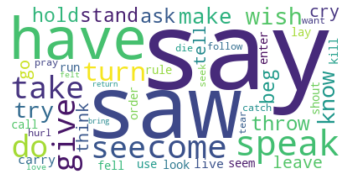

In [27]:
word_cloud(k_agent_he)

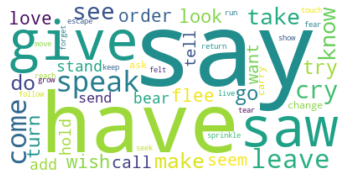

In [28]:
word_cloud(k_agent_she)

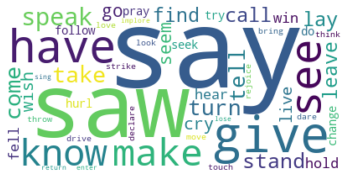

In [30]:
word_cloud(m_agent_he)

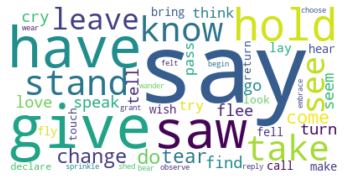

In [31]:
word_cloud(m_agent_she)

# Patient

In [38]:
k_p_he, k_p_she = entire_text_analysis('Kline', 'patient')
m_p_he, m_p_she = entire_text_analysis('More', 'patient')

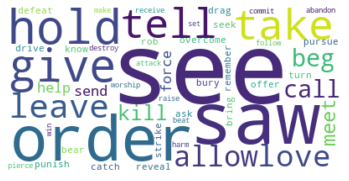

In [39]:
word_cloud(k_p_he)

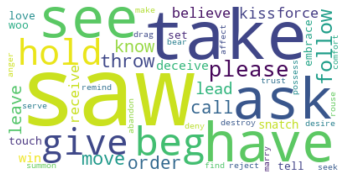

In [40]:
word_cloud(k_p_she)

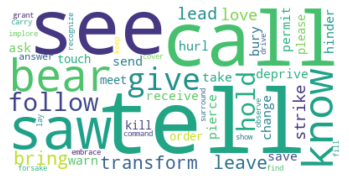

In [41]:
word_cloud(m_p_he)

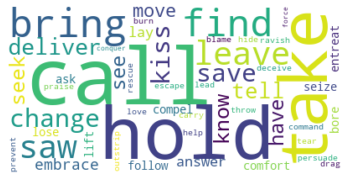

In [42]:
word_cloud(m_p_she)

# Possessives

In [43]:
k_pos_he, k_pos_she = entire_text_analysis('Kline', 'poss')
m_pos_he, m_pos_she = entire_text_analysis('More', 'poss')

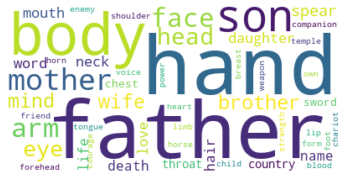

In [44]:
word_cloud(k_pos_he)

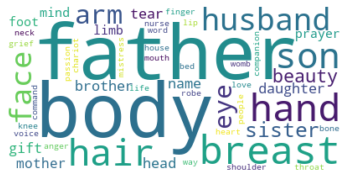

In [45]:
word_cloud(k_pos_she)

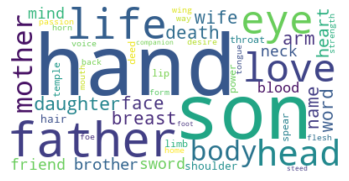

In [46]:
word_cloud(m_pos_he)

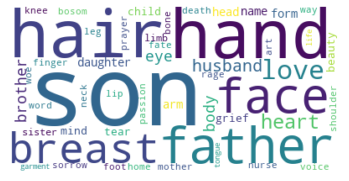

In [47]:
word_cloud(m_pos_she)

# Modifiers

In [51]:
k_mod_he, k_mod_she = entire_text_analysis('Kline', 'mod')
m_mod_he, m_mod_she = entire_text_analysis('More', 'mod')

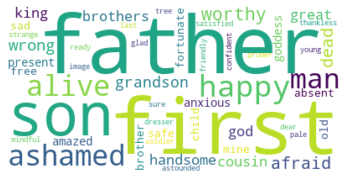

In [57]:
word_cloud(k_mod_he)

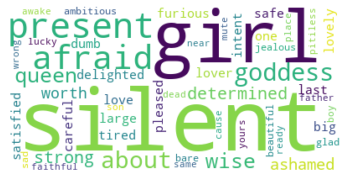

In [58]:
word_cloud(k_mod_she)

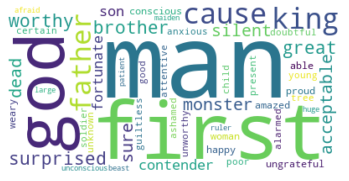

In [59]:
word_cloud(m_mod_he)

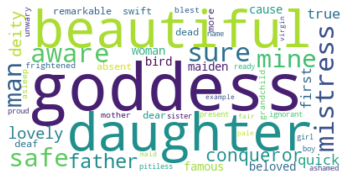

In [60]:
word_cloud(m_mod_she)